


# MNIST Dataset of Handwritten Digits


# Import the required Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

#Load the data


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Data Exploration

In [ ]:
print("Type of x_train:", type(x_train))
print("Shape of x_train:", x_train.shape)
print("Type of y_train:", type(y_train))
print("Shape of y_train:", y_train.shape)

Type of x_train: <class 'numpy.ndarray'>
Shape of x_train: (60000, 28, 28)
Type of y_train: <class 'numpy.ndarray'>
Shape of y_train: (60000,)


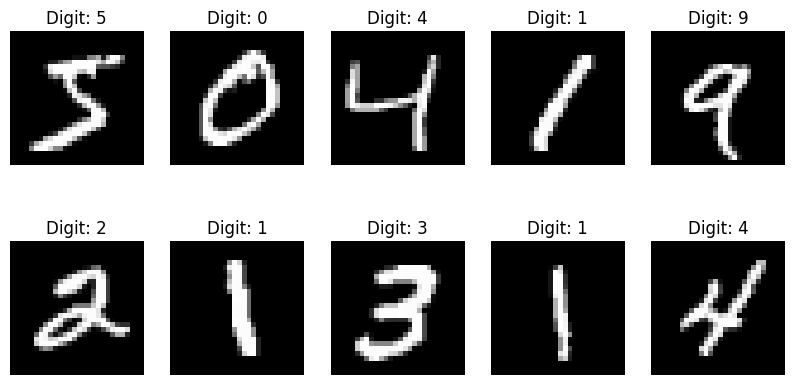

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')

plt.show()

In [ ]:
mean_value = np.mean(x_train)
std_value = np.std(x_train)

print("Mean pixel value:", mean_value)
print("Standard deviation of pixel values:", std_value)

Mean pixel value: 33.318421449829934
Standard deviation of pixel values: 78.56748998339798


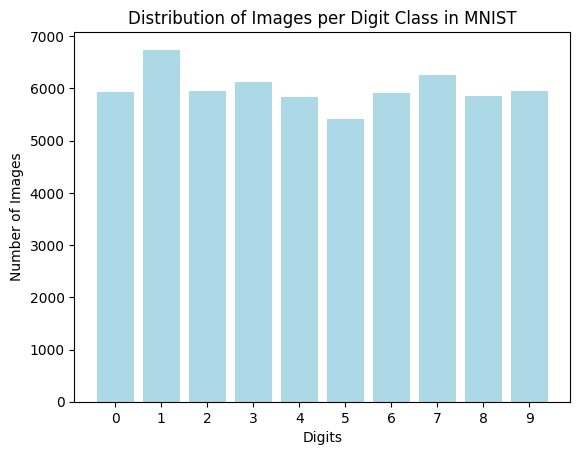

In [ ]:
# Count the number of images per class
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Plotting
plt.bar(class_distribution.keys(), class_distribution.values(), color='lightblue')
plt.xlabel('Digits')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Digit Class in MNIST')
plt.xticks(range(10))
plt.show()

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


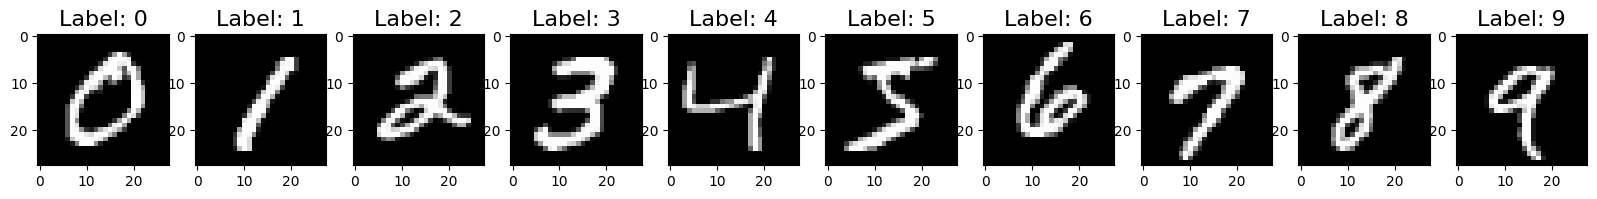

In [ ]:
num_labels = 10
fig, axes = plt.subplots(1, num_labels, figsize=(20, 20))

for label in range(num_labels):
    sample_image = x_train[y_train == label][0]
    axes[label].imshow(sample_image, cmap='gray')
    axes[label].set_title(f"Label: {label}", fontsize=16)

#  Data Preprocessing




In [ ]:
y_train = keras.utils.to_categorical(y_train, num_labels)
y_test = keras.utils.to_categorical(y_test, num_labels)

In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Model Building

#Classical machine learning

**Model1:Decision Tree Classifier**

In [ ]:
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

model = DecisionTreeClassifier(random_state=42)

model.fit(x_train, y_train_labels)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8754


**Model1:Evaluation**

In [ ]:
print(classification_report(y_test_labels, y_pred))
cm = confusion_matrix(y_test_labels, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.83      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



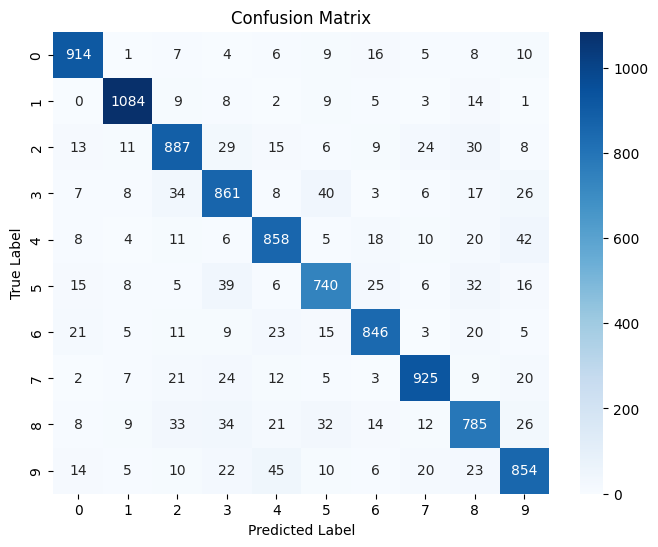

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Model2:SVM**

In [ ]:
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


model = SVC(kernel='linear', random_state=42)

model.fit(x_train, y_train_labels)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9404


**Model2:Evaluation**

In [ ]:
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print(classification_report(y_test_labels, y_pred))

cm = confusion_matrix(y_test_labels, y_pred)

Test Accuracy: 0.9404
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



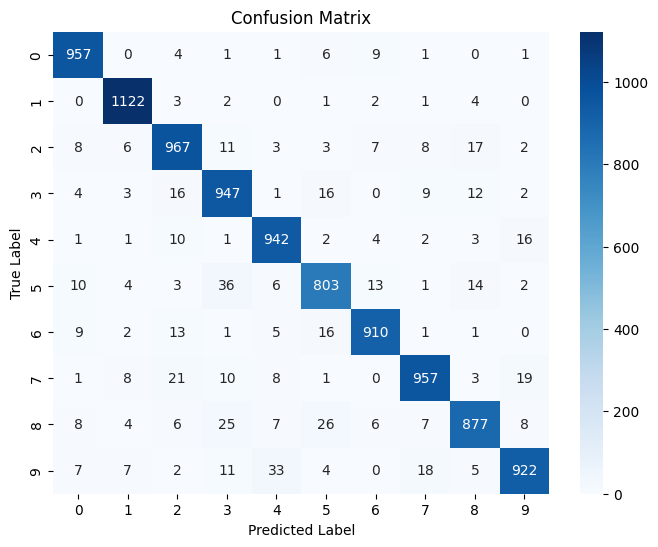

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Deep learning architectures

**Model1:CNN**

In [ ]:
model = Sequential([
    Reshape((28, 28, 1), input_shape=(784,)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_labels, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 34ms/step - accuracy: 0.8551 - loss: 0.4496 - val_accuracy: 0.9831 - val_loss: 0.0517
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.9717 - loss: 0.0957 - val_accuracy: 0.9862 - val_loss: 0.0416
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 31ms/step - accuracy: 0.9808 - loss: 0.0646 - val_accuracy: 0.9900 - val_loss: 0.0295
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9855 - loss: 0.0467 - val_accuracy: 0.9907 - val_loss: 0.0271
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9878 - loss: 0.0395 - val_accuracy: 0.9915 - val_loss: 0.0256
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9890 - loss: 0.0328
Test accuracy: 0.9915


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=7, batch_size=32, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9886 - loss: 0.0371 - val_accuracy: 0.9915 - val_loss: 0.0245
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9905 - loss: 0.0314 - val_accuracy: 0.9910 - val_loss: 0.0271
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.9921 - val_loss: 0.0233
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9932 - loss: 0.0227 - val_accuracy: 0.9927 - val_loss: 0.0267
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9922 - val_loss: 0.0292
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9936 - loss: 0.0208 - val_accuracy: 0.9923 - val_loss: 0.0305
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9933 - val_loss: 0.0265
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9918 - loss: 0.0348
Test acc

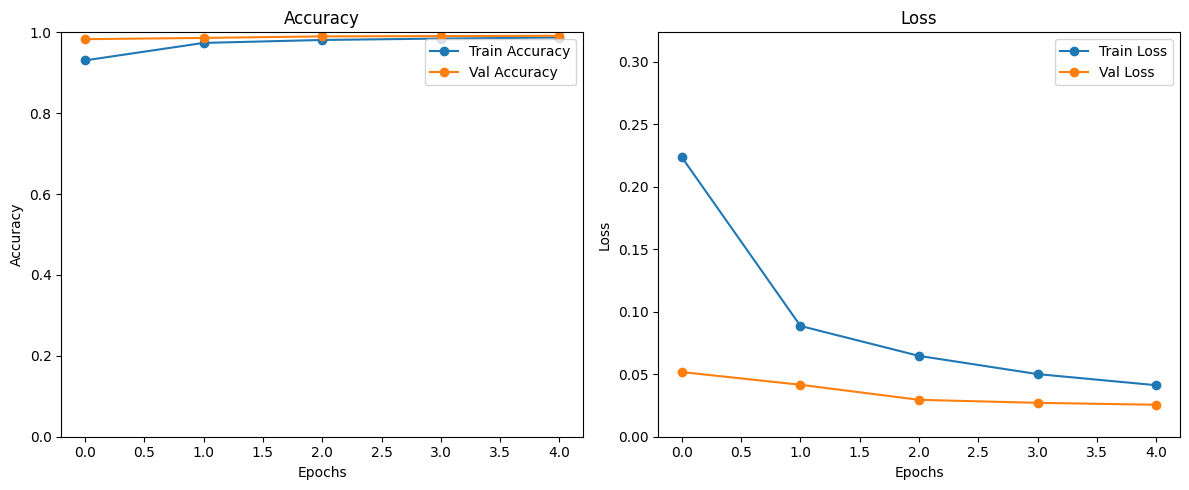

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) + 0.1)
plt.legend()

plt.tight_layout()
plt.show()


**Model1:Evaluation**

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Accuracy: 0.9915
Confusion Matrix:
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1131    2    1    0    0    1    0    0    0]
 [   1    0 1024    3    1    0    0    3    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    0    0  976    0    2    0    2    2]
 [   0    0    0    3    0  887    1    0    0    1]
 [   4    2    0    0    1    4  947    0    0    0]
 [   0    3    5    2    0    0    0 1016    1    1]
 [   2    0    3    1    0    1    0    2  964    1]
 [   2    3    0    1    6    4    0    6    3  984]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99 

**Model2:MLP**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0 # Changed X_train to x_train
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0  # Changed X_test to x_test

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28 * 28,)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test)) # Changed X_train and X_test to x_train and x_test

test_loss, test_acc = model.evaluate(x_test, y_test) # Changed X_test to x_test
print(f"Test accuracy: {test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6394 - loss: 1.0986 - val_accuracy: 0.9327 - val_loss: 0.2303
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8898 - loss: 0.3884 - val_accuracy: 0.9477 - val_loss: 0.1722
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9152 - loss: 0.3075 - val_accuracy: 0.9569 - val_loss: 0.1436
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9252 - loss: 0.2659 - val_accuracy: 0.9618 - val_loss: 0.1272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9339 - loss: 0.2403 - val_accuracy: 0.9662 - val_loss: 0.1198
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9613 - loss: 0.1374
Test accuracy: 0.9662


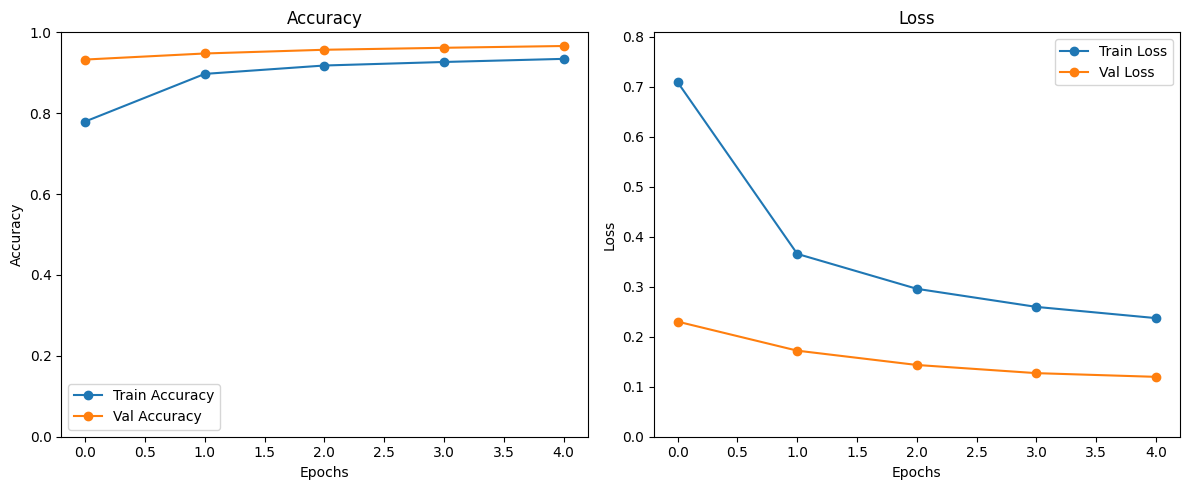

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) + 0.1)
plt.legend()

plt.tight_layout()
plt.show()

**Model2:Evaluation**

In [ ]:
# Predict classes for the test set
y_pred_probs = model.predict(x_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get true labels (convert one-hot encoded to class labels)
y_true = np.argmax(y_test, axis=1)

# Calculate and print metrics
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9662
Confusion Matrix:
[[ 968    0    0    2    0    3    4    1    2    0]
 [   0 1119    3    4    0    1    3    0    5    0]
 [   6    1  997    0    4    0    3    9   11    1]
 [   1    0   10  980    1    5    0    8    4    1]
 [   1    1    5    0  940    0    7    1    4   23]
 [   3    1    1   15    1  850    8    2   10    1]
 [   7    3    0    0    4    7  934    0    3    0]
 [   2   10   15    3    1    0    0  988    1    8]
 [   5    2    3    8    4    7    6    4  932    3]
 [   5    7    1   14   12    4    1    9    2  954]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.95      0.96  